В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



In [7]:
github_raw_url = 'https://raw.githubusercontent.com/tototututo/python_for_ds_tasks/refs/heads/main/HW%202.3/process_bank_churn.py'

!wget -O process_bank_churn.py {github_raw_url}

--2025-07-19 07:54:24--  https://raw.githubusercontent.com/tototututo/python_for_ds_tasks/refs/heads/main/HW%202.3/process_bank_churn.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12772 (12K) [text/plain]
Saving to: ‘process_bank_churn.py’

process_bank_churn. 100%[===================>]  12.47K  --.-KB/s    in 0.003s  

2025-07-19 07:54:24 (4.04 MB/s) - ‘process_bank_churn.py’ saved [12772/12772]



In [8]:
from process_bank_churn import preprocess_data

**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [9]:
import pandas as pd
from google.colab import drive
import os
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
drive.mount('/content/drive')
raw_df = pd.read_csv("drive/MyDrive/ML Course/bank-customer/train.csv")

Mounted at /content/drive


In [11]:
X_train, train_targets, X_val, val_targets, input_cols, scaler, encoder = preprocess_data(
    raw_df,
    target_column='Exited',
    test_size=0.2,
    random_state=42,
    scaler_numeric=True
)

In [13]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, train_targets)

DecisionTreeClassifier(random_state=42)

In [15]:
train_probas = dt_model.predict_proba(X_train)[:, 1]
val_probas = dt_model.predict_proba(X_val)[:, 1]

train_roc_auc = roc_auc_score(train_targets, train_probas)
val_roc_auc = roc_auc_score(val_targets, val_probas)

print(f"Area under ROC (AUROC) на тренувальному наборі: {train_roc_auc:.4f}")
print(f"Area under ROC (AUROC) на валідаційному наборі:  {val_roc_auc:.4f}")

Area under ROC (AUROC) на тренувальному наборі: 1.0000
Area under ROC (AUROC) на валідаційному наборі:  0.7702


**Оцінка моделі**

Модель демонструє **сильне перенавчання (OVERFITTING)**.
AUROC на тренувальному наборі дуже високий, тоді як на валідаційному - значно нижчий.

In [18]:
tree_depth = dt_model.get_depth()
print(f"Глибина дерева: {tree_depth}")

Глибина дерева: 26


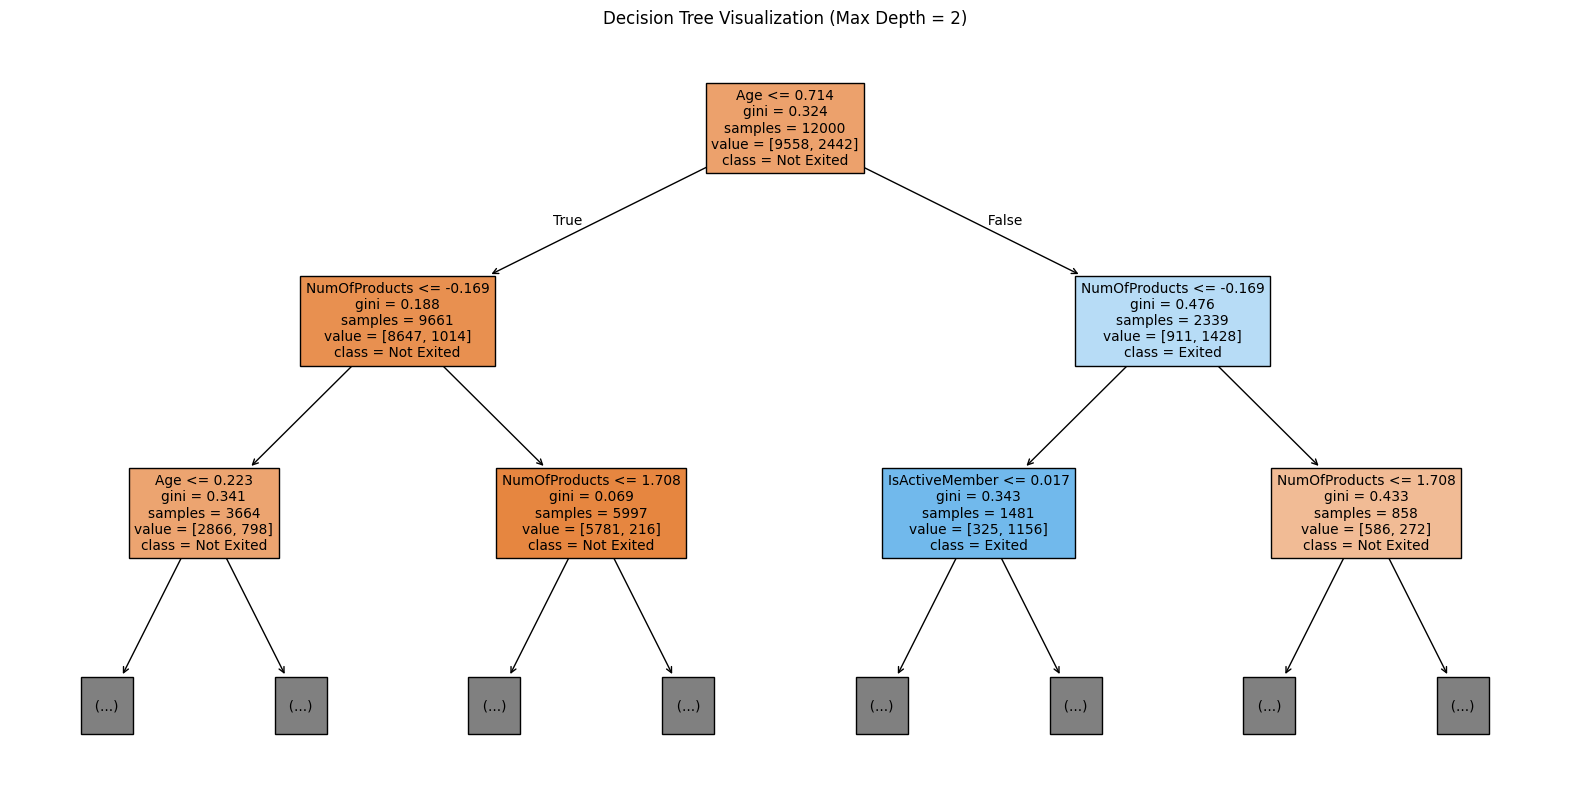

In [22]:
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    max_depth=2,
    feature_names=input_cols,
    class_names=['Not Exited', 'Exited'],
    filled=True,
)
plt.title("Decision Tree Visualization (Max Depth = 2)")
plt.show()

**Спостереження**

Виходячи з візуалізації, найвпливовіші ознаки на глибині 2 такі:

1. Age, кореневий вузол, є найважливішою ознакою для початкового розбиття даних на групи. Дерево спочатку розділяє клієнтів за віком.

2. NumOfProducts. Ця ознака з'являється на першому рівні після кореневого вузла. Вона використовується для подальших розбивок як для молодших, так і для старших вікових груп.

3. IsActiveMember. Ця ознака також з'являється на першому рівні після кореневого вузла, зокрема, у гілці Age <= 0.714 (False). Це показує, що для певної групи клієнтів IsActiveMember є важливим фактором для прийняття рішення.


In [24]:
feature_importances = dt_model.feature_importances_
importance_df = pd.DataFrame({
    'feature': input_cols,
    'importance': feature_importances
})

importance_df = importance_df.sort_values(by='importance', ascending=False)
print("Топ 10 найвпливовіших ознак")
display(importance_df.head(10))

Топ 10 найвпливовіших ознак


,feature,importance
1,Age,0.356789
4,NumOfProducts,0.168379
7,EstimatedSalary,0.123635
0,CreditScore,0.123283
3,Balance,0.079192
2,Tenure,0.052899
6,IsActiveMember,0.032688
11,Gender_Female,0.014908
9,Geography_Germany,0.014725
5,HasCrCard,0.012957


/tmp/ipython-input-25-952596029.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df.head(10), palette='viridis')


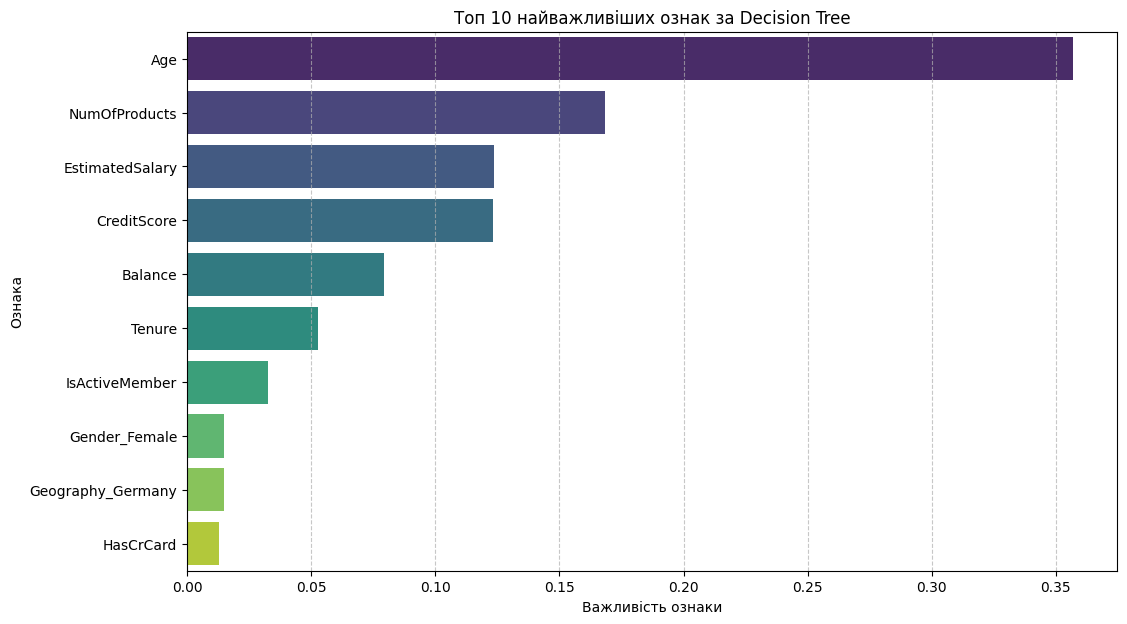

In [25]:
plt.figure(figsize=(12, 7))
sns.barplot(x='importance', y='feature', data=importance_df.head(10), palette='viridis')
plt.title('Топ 10 найважливіших ознак за Decision Tree')
plt.xlabel('Важливість ознаки')
plt.ylabel('Ознака')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [26]:
best_val_roc_auc = 0
best_params = {}
best_train_roc_auc = 0

In [33]:
print("Експериментуємо з max_depth...")
for depth in [3, 4, 5, 6, 7, 8, 9, 10, 12, 15]:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, train_targets)
    train_probas = model.predict_proba(X_train)[:, 1]
    val_probas = model.predict_proba(X_val)[:, 1]
    train_roc_auc = roc_auc_score(train_targets, train_probas)
    val_roc_auc = roc_auc_score(val_targets, val_probas)

    print(f"max_depth={depth}: AUROC_Train={train_roc_auc:.4f}, AUROC_Val={val_roc_auc:.4f}")

    if val_roc_auc > best_val_roc_auc:
        best_val_roc_auc = val_roc_auc
        best_train_roc_auc = train_roc_auc
        best_params = {'max_depth': depth}

Експериментуємо з max_depth...
max_depth=3: AUROC_Train=0.8972, AUROC_Val=0.8911
max_depth=4: AUROC_Train=0.9113, AUROC_Val=0.9113
max_depth=5: AUROC_Train=0.9257, AUROC_Val=0.9219
max_depth=6: AUROC_Train=0.9338, AUROC_Val=0.9211
max_depth=7: AUROC_Train=0.9415, AUROC_Val=0.9144
max_depth=8: AUROC_Train=0.9495, AUROC_Val=0.9031
max_depth=9: AUROC_Train=0.9591, AUROC_Val=0.8847
max_depth=10: AUROC_Train=0.9698, AUROC_Val=0.8484
max_depth=12: AUROC_Train=0.9863, AUROC_Val=0.8249
max_depth=15: AUROC_Train=0.9983, AUROC_Val=0.7958


In [32]:
for nodes in [10, 20, 30, 40, 50, 60, 70, 80, 100, 120, 150]:
    model = DecisionTreeClassifier(max_leaf_nodes=nodes, random_state=42)
    model.fit(X_train, train_targets)
    train_probas = model.predict_proba(X_train)[:, 1]
    val_probas = model.predict_proba(X_val)[:, 1]
    train_roc_auc = roc_auc_score(train_targets, train_probas)
    val_roc_auc = roc_auc_score(val_targets, val_probas)

    print(f"max_leaf_nodes={nodes}: AUROC_Train={train_roc_auc:.4f}, AUROC_Val={val_roc_auc:.4f}")

    if val_roc_auc > best_val_roc_auc:
        best_val_roc_auc = val_roc_auc
        best_train_roc_auc = train_roc_auc
        best_params = {'max_leaf_nodes': nodes}

max_leaf_nodes=10: AUROC_Train=0.9015, AUROC_Val=0.9002
max_leaf_nodes=20: AUROC_Train=0.9179, AUROC_Val=0.9173
max_leaf_nodes=30: AUROC_Train=0.9217, AUROC_Val=0.9191
max_leaf_nodes=40: AUROC_Train=0.9289, AUROC_Val=0.9241
max_leaf_nodes=50: AUROC_Train=0.9312, AUROC_Val=0.9235
max_leaf_nodes=60: AUROC_Train=0.9327, AUROC_Val=0.9197
max_leaf_nodes=70: AUROC_Train=0.9335, AUROC_Val=0.9189
max_leaf_nodes=80: AUROC_Train=0.9348, AUROC_Val=0.9185
max_leaf_nodes=100: AUROC_Train=0.9372, AUROC_Val=0.9115
max_leaf_nodes=120: AUROC_Train=0.9393, AUROC_Val=0.9082
max_leaf_nodes=150: AUROC_Train=0.9422, AUROC_Val=0.9041


In [29]:
candidate_depths = [4, 5, 6, 7, 8]
candidate_leaf_nodes = [30, 40, 50, 60, 70]

In [30]:
for depth in candidate_depths:
    for nodes in candidate_leaf_nodes:
        model = DecisionTreeClassifier(max_depth=depth, max_leaf_nodes=nodes, random_state=42)
        model.fit(X_train, train_targets)
        train_probas = model.predict_proba(X_train)[:, 1]
        val_probas = model.predict_proba(X_val)[:, 1]
        train_roc_auc = roc_auc_score(train_targets, train_probas)
        val_roc_auc = roc_auc_score(val_targets, val_probas)

        print(f"max_depth={depth}, max_leaf_nodes={nodes}: AUROC_Train={train_roc_auc:.4f}, AUROC_Val={val_roc_auc:.4f}")

        if val_roc_auc > best_val_roc_auc:
            best_val_roc_auc = val_roc_auc
            best_train_roc_auc = train_roc_auc
            best_params = {'max_depth': depth, 'max_leaf_nodes': nodes}

max_depth=4, max_leaf_nodes=30: AUROC_Train=0.9113, AUROC_Val=0.9113
max_depth=4, max_leaf_nodes=40: AUROC_Train=0.9113, AUROC_Val=0.9113
max_depth=4, max_leaf_nodes=50: AUROC_Train=0.9113, AUROC_Val=0.9113
max_depth=4, max_leaf_nodes=60: AUROC_Train=0.9113, AUROC_Val=0.9113
max_depth=4, max_leaf_nodes=70: AUROC_Train=0.9113, AUROC_Val=0.9113
max_depth=5, max_leaf_nodes=30: AUROC_Train=0.9257, AUROC_Val=0.9219
max_depth=5, max_leaf_nodes=40: AUROC_Train=0.9257, AUROC_Val=0.9219
max_depth=5, max_leaf_nodes=50: AUROC_Train=0.9257, AUROC_Val=0.9219
max_depth=5, max_leaf_nodes=60: AUROC_Train=0.9257, AUROC_Val=0.9219
max_depth=5, max_leaf_nodes=70: AUROC_Train=0.9257, AUROC_Val=0.9219
max_depth=6, max_leaf_nodes=30: AUROC_Train=0.9264, AUROC_Val=0.9227
max_depth=6, max_leaf_nodes=40: AUROC_Train=0.9291, AUROC_Val=0.9219
max_depth=6, max_leaf_nodes=50: AUROC_Train=0.9326, AUROC_Val=0.9220
max_depth=6, max_leaf_nodes=60: AUROC_Train=0.9338, AUROC_Val=0.9214
max_depth=6, max_leaf_nodes=70: AU

In [31]:
print(f"Найкращі параметри: {best_params}")
print(f"Відповідний AUROC на тренувальному наборі: {best_train_roc_auc:.4f}")
print(f"Відповідний AUROC на валідаційному наборі:  {best_val_roc_auc:.4f}")

Найкращі параметри: {'max_depth': 7, 'max_leaf_nodes': 40}
Відповідний AUROC на тренувальному наборі: 0.9298
Відповідний AUROC на валідаційному наборі:  0.9246


**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

In [34]:
train_roc_aucs = []
val_roc_aucs = []
depths = range(1, 21)

In [35]:
for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, train_targets)

    train_probas = model.predict_proba(X_train)[:, 1]
    val_probas = model.predict_proba(X_val)[:, 1]

    train_roc_auc = roc_auc_score(train_targets, train_probas)
    val_roc_auc = roc_auc_score(val_targets, val_probas)

    train_roc_aucs.append(train_roc_auc)
    val_roc_aucs.append(val_roc_auc)

    print(f"max_depth={depth:2d}: AUROC_Train={train_roc_auc:.4f}, AUROC_Val={val_roc_auc:.4f}")

max_depth= 1: AUROC_Train=0.7447, AUROC_Val=0.7349
max_depth= 2: AUROC_Train=0.8429, AUROC_Val=0.8465
max_depth= 3: AUROC_Train=0.8972, AUROC_Val=0.8911
max_depth= 4: AUROC_Train=0.9113, AUROC_Val=0.9113
max_depth= 5: AUROC_Train=0.9257, AUROC_Val=0.9219
max_depth= 6: AUROC_Train=0.9338, AUROC_Val=0.9211
max_depth= 7: AUROC_Train=0.9415, AUROC_Val=0.9144
max_depth= 8: AUROC_Train=0.9495, AUROC_Val=0.9031
max_depth= 9: AUROC_Train=0.9591, AUROC_Val=0.8847
max_depth=10: AUROC_Train=0.9698, AUROC_Val=0.8484
max_depth=11: AUROC_Train=0.9780, AUROC_Val=0.8411
max_depth=12: AUROC_Train=0.9863, AUROC_Val=0.8249
max_depth=13: AUROC_Train=0.9920, AUROC_Val=0.8103
max_depth=14: AUROC_Train=0.9960, AUROC_Val=0.7950
max_depth=15: AUROC_Train=0.9983, AUROC_Val=0.7958
max_depth=16: AUROC_Train=0.9994, AUROC_Val=0.7823
max_depth=17: AUROC_Train=0.9998, AUROC_Val=0.7822
max_depth=18: AUROC_Train=0.9999, AUROC_Val=0.7828
max_depth=19: AUROC_Train=1.0000, AUROC_Val=0.7738
max_depth=20: AUROC_Train=1.000

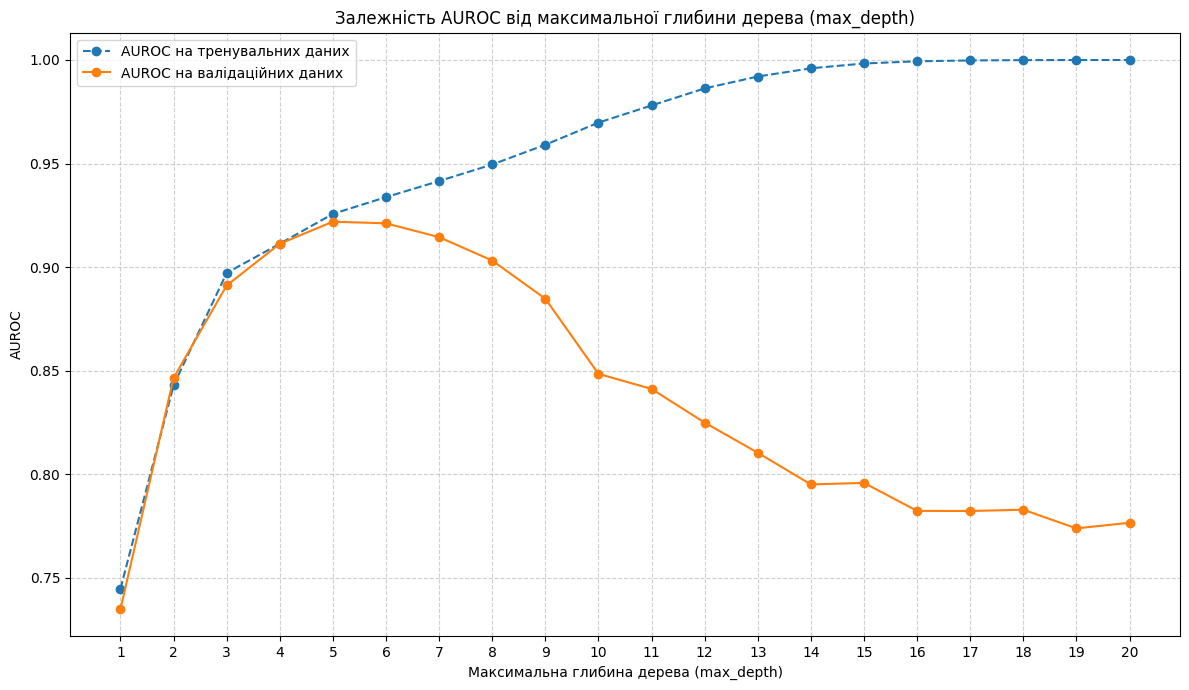

In [36]:
plt.figure(figsize=(12, 7))
plt.plot(depths, train_roc_aucs, label='AUROC на тренувальних даних', marker='o', linestyle='--')
plt.plot(depths, val_roc_aucs, label='AUROC на валідаційних даних', marker='o', linestyle='-')
plt.title('Залежність AUROC від максимальної глибини дерева (max_depth)')
plt.xlabel('Максимальна глибина дерева (max_depth)')
plt.ylabel('AUROC')
plt.xticks(depths) # Показуємо всі значення max_depth на осі x
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [53]:
from process_bank_churn import preprocess_data, preprocess_new_data, identify_features

In [42]:
raw_data_path = "drive/MyDrive/ML Course/bank-customer/train.csv"
test_data_path = "drive/MyDrive/ML Course/bank-customer/test.csv"
output_submission_path = 'submission_dt_optimized.csv'

raw_df = pd.read_csv(raw_data_path)

In [68]:
best_max_depth = 4

In [69]:
X_train_full, y_train_full, X_val_full, y_val_full, input_cols, scaler, encoder = preprocess_data(
    raw_df,
    target_column='Exited',
    test_size=0.2,
    random_state=42,
    scaler_numeric=True
)

In [70]:
X_full_train = pd.concat([X_train_full, X_val_full])
y_full_train = pd.concat([y_train_full, y_val_full])

In [71]:
final_dt_model = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)
final_dt_model.fit(X_full_train, y_full_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [72]:
final_train_probas = final_dt_model.predict_proba(X_full_train)[:, 1]
final_train_roc_auc = roc_auc_score(y_full_train, final_train_probas)

In [73]:
test_raw_df = pd.read_csv(test_data_path)

In [74]:
test_raw_df.shape

(10000, 13)

In [75]:
_, original_categorical_cols = identify_features(raw_df.drop(columns=['Exited'], errors='ignore'), 'Exited')
original_numeric_cols, _ = identify_features(raw_df.drop(columns=['Exited'], errors='ignore'), 'Exited')

In [76]:
X_test_processed = preprocess_new_data(
    new_df=test_raw_df,
    numeric_cols=original_numeric_cols,
    categorical_cols=original_categorical_cols,
    scaler=scaler,
    encoder=encoder,
    input_cols=input_cols,
    scaler_numeric=True
)

In [56]:
X_test_processed.shape

(10000, 13)

In [57]:
X_test_processed.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-1.034678,-0.944682,-1.087792,1.720173,-1.108193,0.515062,1.016977,0.875226,0.0,1.0,0.0,0.0,1.0
1,-1.490909,0.161227,-0.009376,-0.717950,0.769304,0.515062,1.016977,-1.109098,1.0,0.0,0.0,0.0,1.0
2,0.651991,0.652742,1.069040,-0.717950,0.769304,0.515062,-0.983306,0.850584,1.0,0.0,0.0,0.0,1.0
3,0.804068,0.898500,-0.728320,-0.717950,-1.108193,0.515062,1.016977,1.073044,0.0,0.0,1.0,0.0,1.0
4,-0.924077,0.652742,1.069040,-0.717950,0.769304,0.515062,1.016977,0.563521,0.0,0.0,1.0,0.0,1.0


In [77]:
test_predictions_proba = final_dt_model.predict_proba(X_test_processed)[:, 1]

In [78]:
test_predictions_classes = (test_predictions_proba > 0.5).astype(int)

In [79]:
submission_df = pd.DataFrame({
    'id': test_raw_df['id'],
    'Exited': test_predictions_classes
})

In [80]:
submission_df.head()

,id,Exited
0,15000,0
1,15001,0
2,15002,0
3,15003,1
4,15004,0


In [81]:
submission_df.to_csv(output_submission_path, index=False)

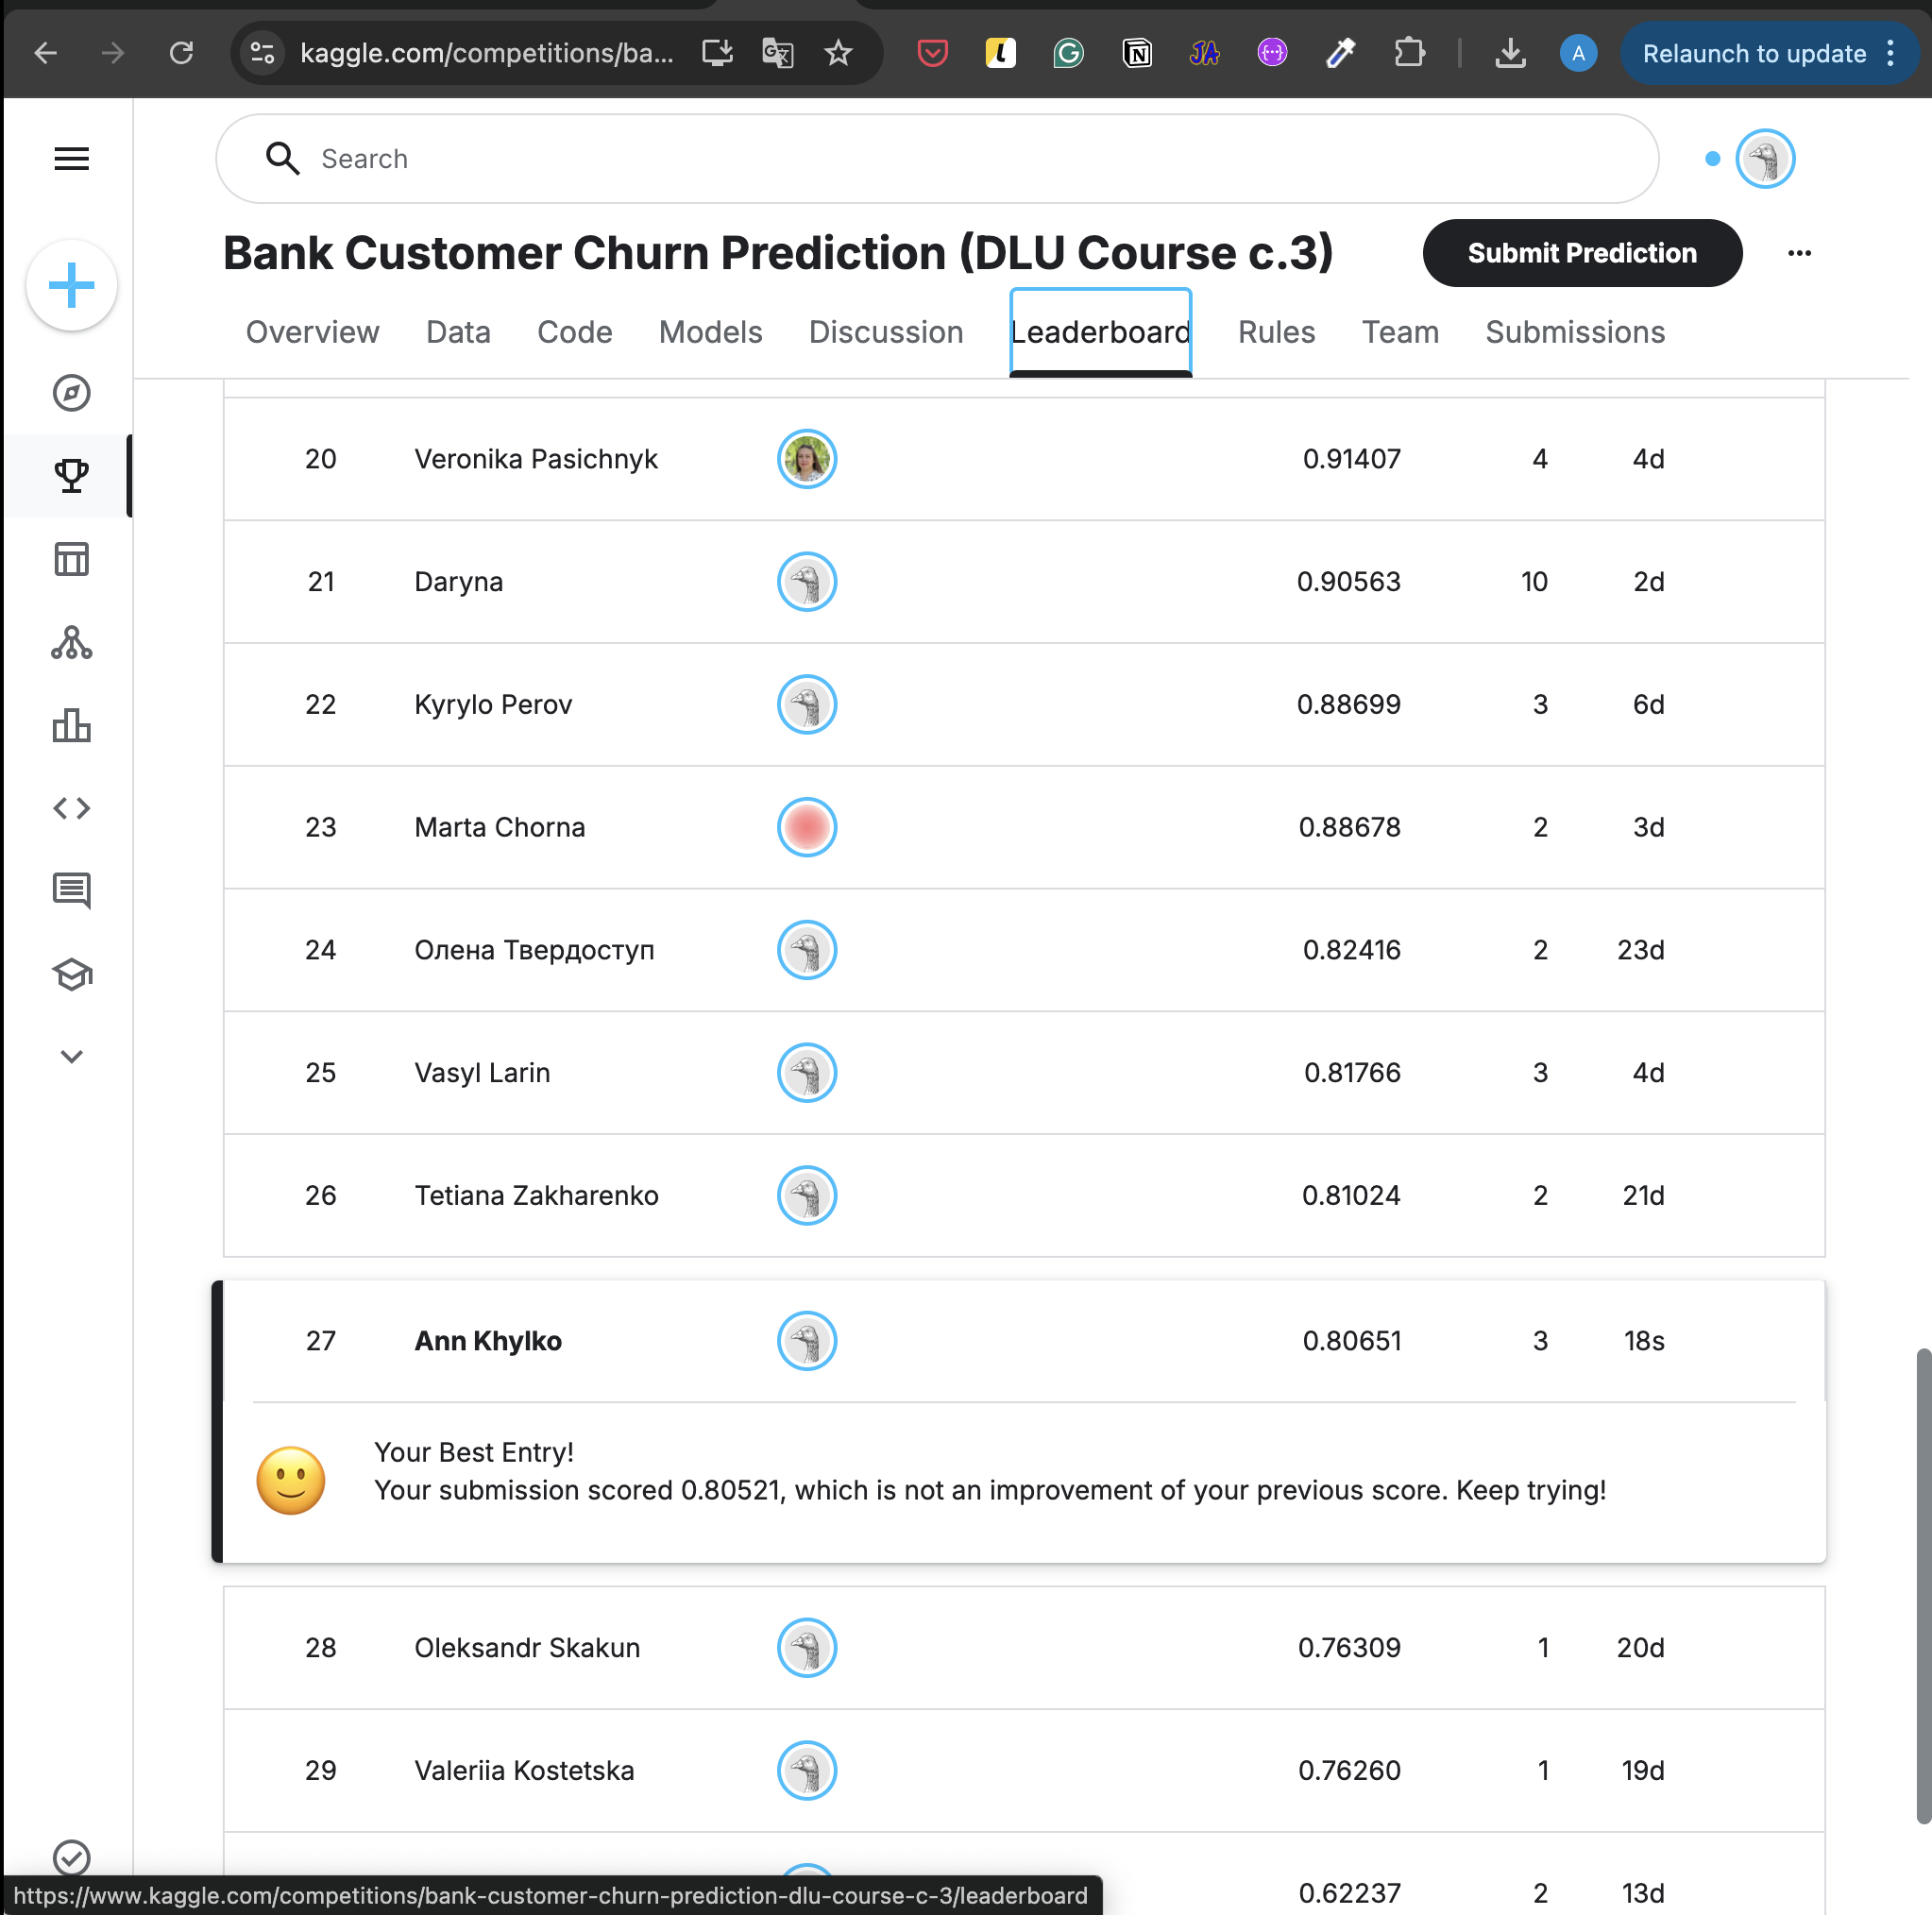